In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [ ]:
T = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [ ]:
for t in T:
    df = pd.read_csv('../data/step3/{}.csv'.format(t))
    df = df[['rm-rf', 'SMB', 'HML', 'RMW', 'CMA']]
    sns.set(style='whitegrid', context='notebook')
    sns.pairplot(df, size=2.5, kind="reg", diag_kind="kde")
    plt.savefig('../figure/pairplot/{}.png'.format(t))
    

In [45]:
for t in T:
    df = pd.read_csv('../data/step3/{}.csv'.format(t))
    df = df[['rm-rf', 'SMB', 'HML', 'RMW', 'CMA']]
    print('\n======================第' + str(t - 2) + '年到' + str(t) + '年=======================')
    print(df.describe())
    print('\n')


======================第2010年到2012年=======================
           rm-rf        SMB        HML        RMW        CMA
count  25.000000  25.000000  25.000000  25.000000  25.000000
mean   -0.253879   0.011900   0.013916  -0.010638  -0.008490
std     0.083164   0.279571   0.035301   0.019873   0.015573
min    -0.374919  -0.500126  -0.057957  -0.070053  -0.046456
25%    -0.326836  -0.184664  -0.007381  -0.021858  -0.019456
50%    -0.250656   0.028331   0.007803  -0.009443  -0.006343
75%    -0.216967   0.162157   0.031879   0.005973   0.001740
max    -0.063217   0.601253   0.107063   0.025059   0.017661



======================第2011年到2013年=======================
           rm-rf        SMB        HML        RMW        CMA
count  25.000000  25.000000  25.000000  25.000000  25.000000
mean   -0.274803  -0.017902   0.007833  -0.014431  -0.011468
std     0.068542   0.306351   0.027281   0.025901   0.013188
min    -0.382552  -0.620322  -0.067092  -0.073725  -0.038159
25%    -0.333903  -0.23211

In [39]:
tb = PrettyTable()
tb.title = 'Correlation between SMB and HML'
tb.align = 'c'
for t in T:
    df = pd.read_csv('../data/step3/{}.csv'.format(t))
    tb.field_names = ["Time Period", "Cov", "Pearson", "Spearman", "Kendall"]
    cov = round(df['SMB'].cov(df['HML']), 5)
    pearson = round(df['SMB'].corr(df['HML'], method="pearson"), 2)
    spearman = round(df['SMB'].corr(df['HML'], method="spearman"), 2)
    kendall = round(df['SMB'].corr(df['HML'], method="kendall"), 2)
    tb.add_row(['{}~{}'.format(t - 2, t), cov, pearson, spearman, kendall])
print(tb)

+-------------------------------------------------------+
|            Correlation between SMB and HML            |
+-------------+----------+---------+----------+---------+
| Time Period |   Cov    | Pearson | Spearman | Kendall |
+-------------+----------+---------+----------+---------+
|  2010~2012  | 0.00458  |   0.46  |   0.44   |   0.29  |
|  2011~2013  |  0.0031  |   0.37  |   0.32   |   0.23  |
|  2012~2014  | 0.00107  |   0.1   |   0.13   |   0.09  |
|  2013~2015  | 0.00527  |   0.24  |   0.22   |   0.18  |
|  2014~2016  | 0.01728  |   0.42  |   0.57   |   0.4   |
|  2015~2017  | 0.00784  |   0.66  |   0.53   |   0.36  |
|  2016~2018  | 0.00046  |   0.11  |   0.05   |   0.06  |
|  2017~2019  | 0.00213  |   0.31  |   0.29   |   0.21  |
|  2018~2020  |  0.0024  |   0.33  |   0.25   |   0.16  |
|  2019~2021  | -0.00076 |  -0.12  |  -0.09   |  -0.06  |
+-------------+----------+---------+----------+---------+


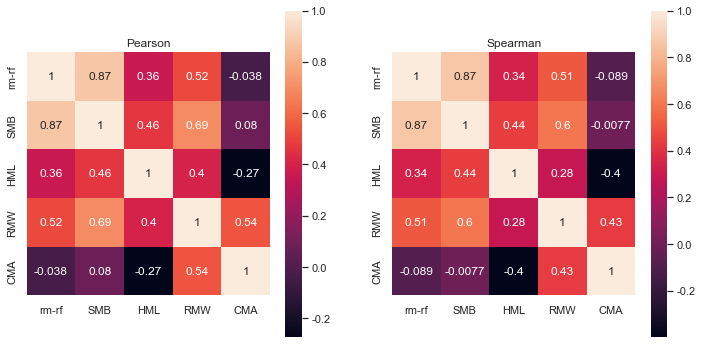

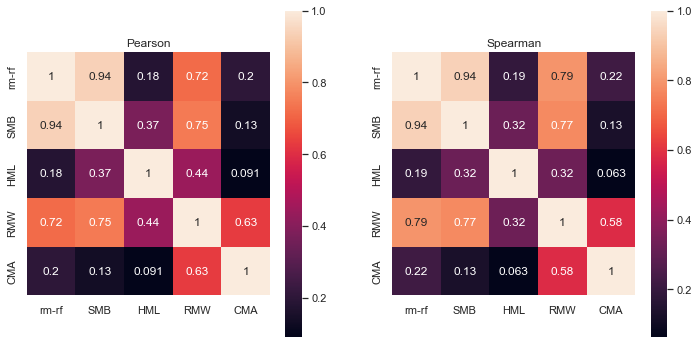

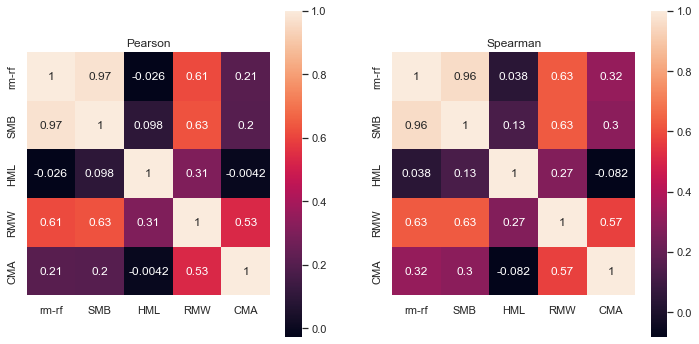

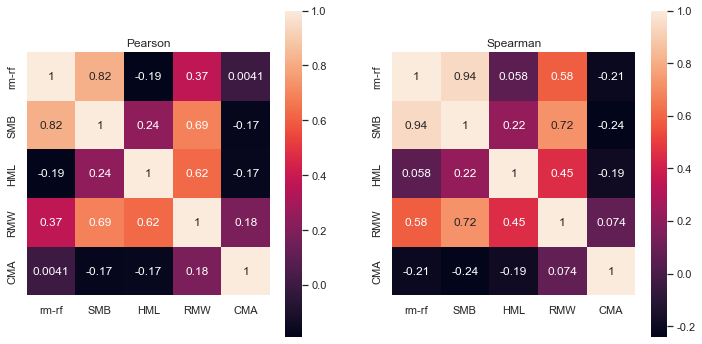

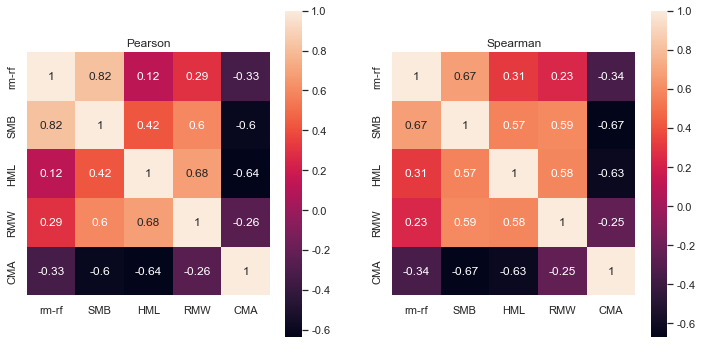

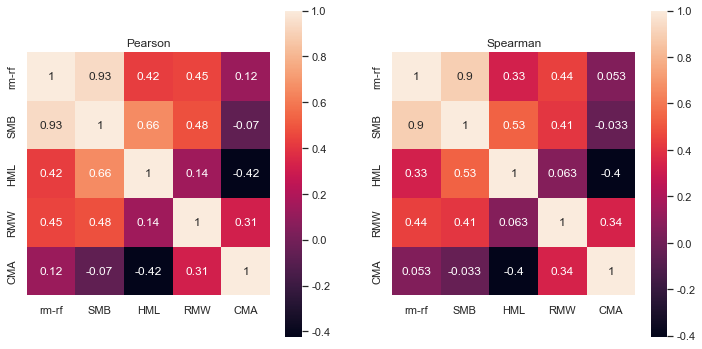

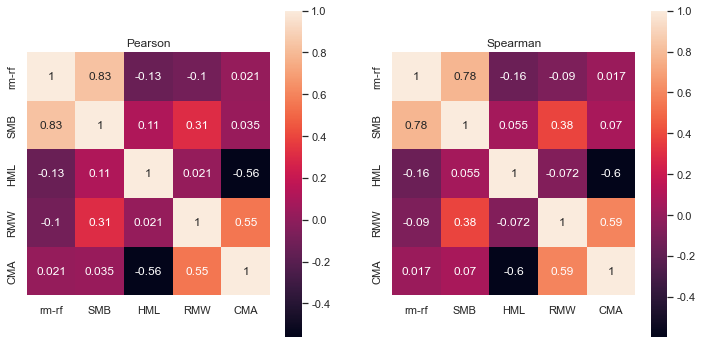

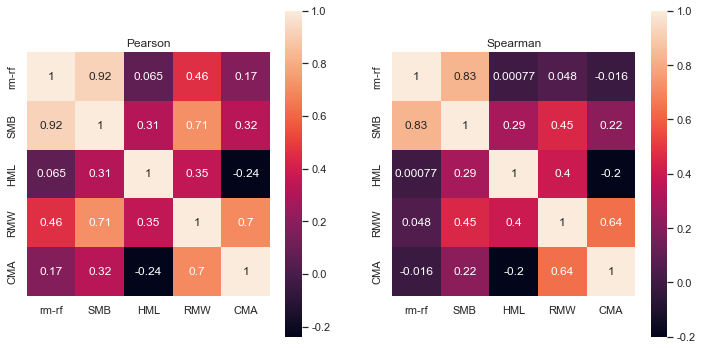

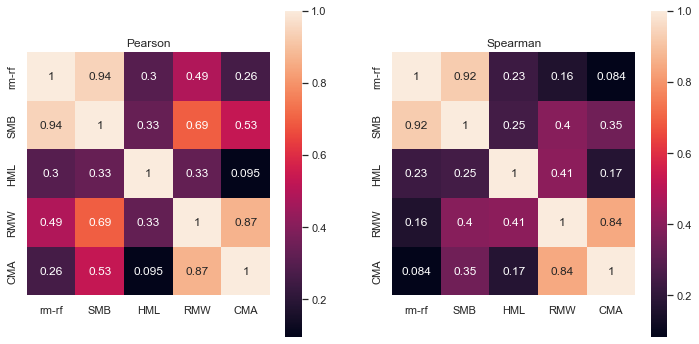

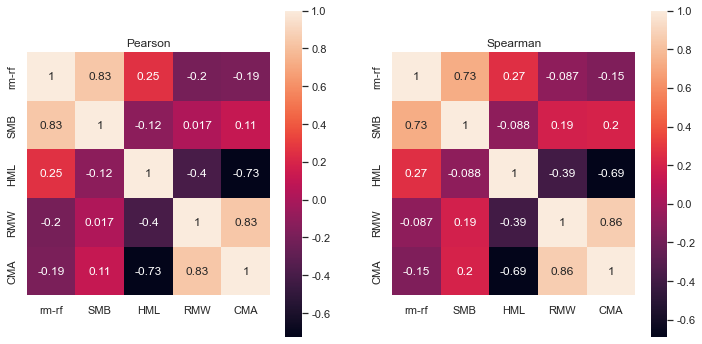

In [38]:
for t in T:
    df = pd.read_csv('../data/step3/{}.csv'.format(t))
    df = df[['rm-rf', 'SMB', 'HML', 'RMW', 'CMA']]
    figure, ax = plt.subplots(figsize=(12, 6))
    ax1 = plt.subplot(1, 2, 1)
    sns.heatmap(df.corr(method="pearson"), square=True, annot=True, ax=ax1)
    plt.title('Pearson')
    ax2 = plt.subplot(1, 2, 2)
    sns.heatmap(df.corr(method="spearman"), square=True, annot=True, ax=ax2)
    plt.title('Spearman')
    plt.savefig('../figure/heatmap/{}.png'.format(t))